## Exercícios - transformações geométricas

1. Crie uma função `mirror`, que recebe `img` (`np.array`), `reverse_x` (`bool`) e `reverse_y` (`bool`) e retorna uma nova imagem, onde caso `reverse_EIXO` seja verdadeiro, esta deve ser `img` espelhada em EIXO. Em seguida, teste sua função com uma imagem de sua escolha.

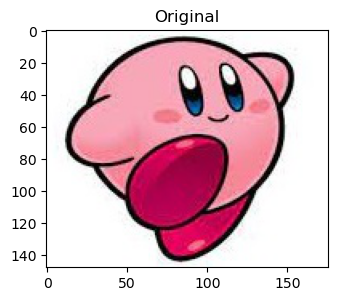

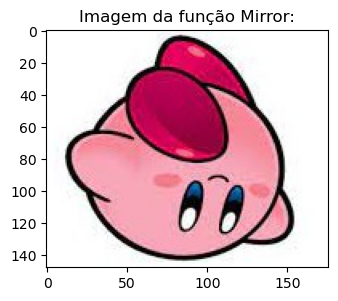

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

kirby = np.array(Image.open('kirby.jpeg'))

plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.title('Original')
plt.imshow(kirby)

import numpy as np

def mirror(img, reverse_x=False, reverse_y=False):
    mirror_img = np.copy(img)
    
    if reverse_x:
        mirror_img = np.flip(mirror_img, axis=0)
    
    if reverse_y:
        mirror_img = np.flip(mirror_img, axis=1)
    
    return mirror_img

mirror_kirby = mirror(kirby, True, False)

plt.figure(figsize=(8,8))
plt.subplot(2,2,2)
plt.title('Imagem da função Mirror:')
plt.imshow(mirror_kirby)   
   
    


2. Escolha uma imagem qualquer e realize um cisalhamento nela, sendo os fatores de sua escolha.

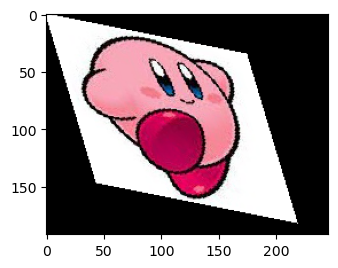

In [8]:
def cisalha(img, cx, cy):
    # Obtendo as dimensões da imagem:
    (l, c, p) = img.shape
    
    # Calculando as novas dimensões após cisalhamento, adicionando uma margem de 10% nas direções horizontal e vertical:
    img_cs = np.zeros(shape=(int(l * (1.1 + cy)), int(c * (1.1 + cx)), p), dtype=np.uint8)
    
    for i in range(l):
        for j in range(c):
            new_x = int(j + cx * i)  # Nova coordenada x após o cx
            new_y = int(cy * j + i)  # Nova coordenada y após o cy
            img_cs[new_y, new_x] = img[i, j] 
            
    return img_cs


# Chamando a função cisalhamento com cx=0.3 e cy=0.2:
kirby_cs = cisalha(kirby, 0.3, 0.2)

# Mostrando a imagem do dog com oculos cisalhada na tela:
plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.imshow(kirby_cs)

3. **(Desafio)** Escreva uma função que realize uma mudança de escala por interpolação bilinear em uma imagem.

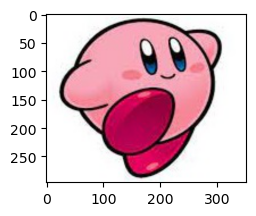

In [43]:
def bilinear_interpolation(img, sx, sy):
    # Obtendo as dimensões da imagem original
    c, l, p = img.shape
    # Calculando as novas dimensões da imagem após a interpolação
    cs = int(c * sy)
    ls = int(l * sx)
    
    # Criando uma matriz de zeros para a nova imagem com as dimensões calculadas
    new_image = np.zeros((cs, ls, p), dtype=np.uint8)
    
    # Iterando sobre cada pixel na nova imagem
    for y in range(cs):
        for x in range(ls):
            # Coordenadas na imagem original correspondentes ao pixel na nova imagem
            x_original = x / sx
            y_original = y / sy
            
            # Determinando os índices dos quatro pixels vizinhos na imagem original
            x1 = int(x_original)
            x2 = min(x1 + 1, l - 1)
            y1 = int(y_original)
            y2 = min(y1 + 1, c - 1)
            
            # Calculando os pesos para interpolação bilinear
            weight_x = x_original - x1
            weight_y = y_original - y1
            
            # Interpolação bilinear para cada canal de cor
            for i in range(p):
                interpolated_value = (1 - weight_x) * (1 - weight_y) * img[y1, x1, i] + \
                                     weight_x * (1 - weight_y) * img[y1, x2, i] + \
                                     (1 - weight_x) * weight_y * img[y2, x1, i] + \
                                     weight_x * weight_y * img[y2, x2, i]
                # Atribuindo o valor interpolado ao pixel correspondente na nova imagem
                new_image[y, x, i] = interpolated_value
            
    return new_image

# Realizando a interpolação bilinear na imagem "kirby" com um fator de escala de 2 em ambas as direções
nova_imagem = bilinear_interpolation(kirby, 2, 2)

# Mostrando a nova imagem na mesma figura
plt.subplot(2, 2, 2)  # Utilizando o mesmo subplot criado anteriormente
plt.imshow(nova_imagem)

